<a href="https://colab.research.google.com/github/lavanyagowda1998/internship/blob/master/bcintern5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation
data = pd.read_csv("wisc_bc_data.csv")# here header 0 means the 0 th row is our coloumn 
                                                # header in data

# have a look at the data
print(data.head(2))

         id diagnosis  ...  symmetry_worst  dimension_worst
0  87139402         B  ...          0.2827          0.06771
1   8910251         B  ...          0.2940          0.07587

[2 rows x 32 columns]


In [13]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [17]:
# like this we also don't want the Id column for our analysis
data.drop("id",axis=1,inplace=True)

# As I said above the data can be divided into three parts.lets divied the features according to their category
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)



['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean', 'symmetry_mean', 'dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']


In [18]:
data.describe() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


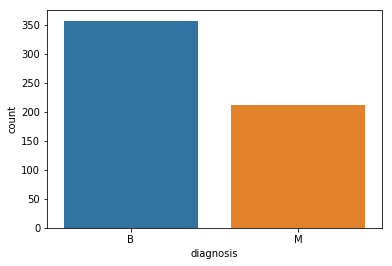

In [19]:
sns.countplot(data['diagnosis'],label="Count")


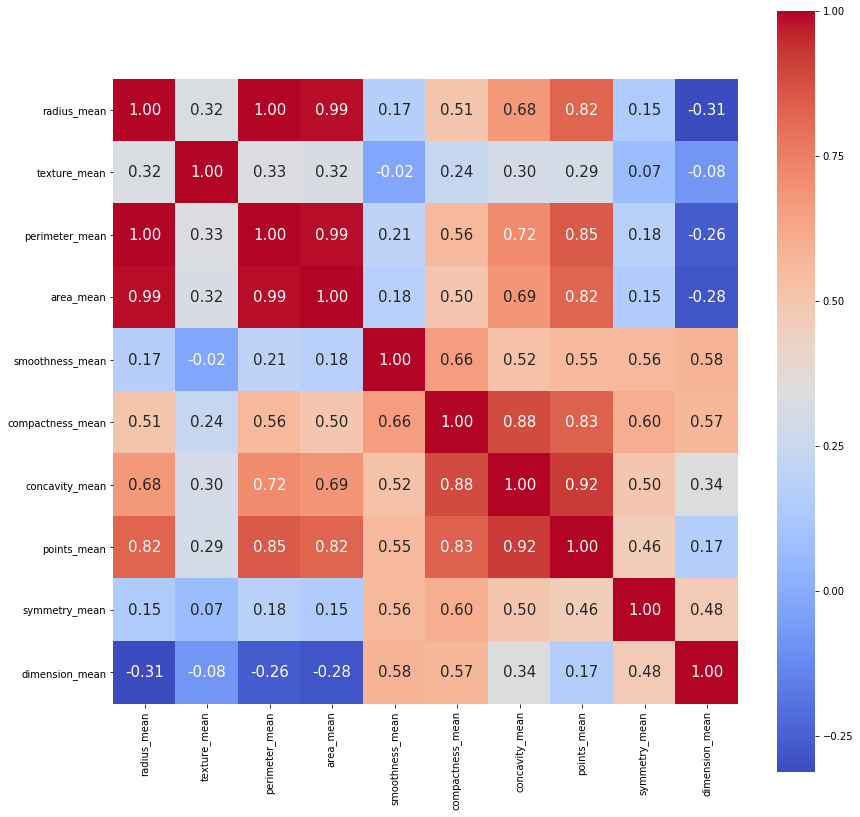

In [20]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)


In [21]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
# now these are the variables which will use for prediction

#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)



(398, 31)
(171, 31)


In [22]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

model=RandomForestClassifier(n_estimators=100)# a simple random forest model

model.fit(train_X,train_y)# now fit our model for traiing data



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs

metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values



0.9122807017543859

In [24]:
# lets now try with SVM

model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8713450292397661

In [26]:
#Now lets do this for all feature_mean so that from Random forest we can get the feature which are important

prediction_var = features_mean # taking all features

train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

model=RandomForestClassifier(n_estimators=100)

model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)



0.935672514619883

In [27]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used


points_mean         0.263648
radius_mean         0.182317
concavity_mean      0.140919
perimeter_mean      0.139241
area_mean           0.106324
texture_mean        0.069636
compactness_mean    0.032529
smoothness_mean     0.025889
symmetry_mean       0.020155
dimension_mean      0.019341
dtype: float64


In [28]:
# first lets do with SVM also using all features

model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7251461988304093

In [31]:
prediction_var=['concavity_mean','perimeter_mean'  , 'radius_mean','area_mean']      

train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)




0.9181286549707602

In [32]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7192982456140351

In [33]:
# so from this discussion we got multi colinearty effecting our SVM part a lot 
# but its not affecting so much randomforest because for random forest we dont need to make so much effort for our analysis part
# now lets do with the 3rd part of data which is worst
# first start with all features_worst

prediction_var = features_worst

train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6783625730994152

In [34]:
# but same problem With SVM, very much less accuray I think we have to tune its parameter
# that i will do later in intermidate part
#now we can get the important features from random forest now run Random Forest for it 

model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)



0.9649122807017544

In [35]:
# the accuracy for RandomForest invcrease it means the value are more catogrical in Worst part
#lets get the important features
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used


area_worst           0.241807
perimeter_worst      0.201632
radius_worst         0.163201
points_worst         0.156678
concavity_worst      0.082893
texture_worst        0.048909
compactness_worst    0.033360
symmetry_worst       0.031361
smoothness_worst     0.024051
dimension_worst      0.016107
dtype: float64


In [37]:
# same parameter but with great importance and here it seamed the only conacve points_worst is making 
# very important so it may be bias lets check only for top 4 important features

prediction_var = ['radius_worst','area_worst','perimeter_worst','concavity_worst'] 

train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)



0.9473684210526315

In [38]:
#check for SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6666666666666666

In [41]:
# now I think for simplicity the Randomforest will be better for prediction

# Now explore a little bit more
# now from features_mean i will try to find the variable which can be use for classify
# so lets plot a scatter plot for identify those variable who have a separable boundary between two class
#of cancer

# Lets start with the data analysis for features_mean
# Just try to understand which features can be used for prediction
# I will plot scatter plot for the all features_mean for both of diagnosis Category
# and from it we will find which are easily can used for differenciate between two category
from pandas.plotting import scatter_matrix
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix



AttributeError: ignored

In [42]:
# So predicton features will be 
features_mean


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'points_mean',
 'symmetry_mean',
 'dimension_mean']

In [43]:
data_X= data[prediction_var]
data_y= data["diagnosis"]

# lets Make a function for Grid Search CV
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    # this is how we use grid serch CV we are giving our model
    # the we gave parameters those we want to tune
    # Cv is for cross validation
    # scoring means to score the classifier
    
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters#
    print(clf.best_score_)
    
    
    
    

# Here we have to take parameters that are used for Decison tree Classifier
# you will understand these terms once you follow the link above
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
# here our gridasearchCV will take all combinations of these parameter and apply it to model 
# and then it will find the best parameter for model
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)
# call our function



The best parameter found on development set is :
{'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 10}
the bset estimator is 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
The best score is 
0.9371859296482412


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [46]:
#observation

   # the score increase to 95 %
    #Seems to be good
    #Lets do with KNN
    #link for KNN Link
    #if you are a beginner please follow the link it will be very much useful

model = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)



The best parameter found on development set is :
{'leaf_size': 1, 'n_neighbors': 27, 'weights': 'distance'}
the bset estimator is 
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='distance')
The best score is 
0.9120603015075377


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameter found on development set is :
{'C': 100, 'kernel': 'linear'}
the bset estimator is 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
The best score is 
0.9321608040201005
